<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Seyed Mohammad Ojagh kazazi

**Student ID**: 400100554





# Logistic Regression

In [2]:
# all libraries are imported
import numpy as np # type: ignore
import pandas as pd # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import classification_report # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
import torch # type: ignore

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [3]:
class LogisticRegressionModel:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    def get_params(self, deep=True):
        return {"learning_rate": self.learning_rate, "num_iterations": self.num_iterations}

    def sigmoid(self, z):
        return 1 / (1 + torch.exp(-z))

    def loss(self, y, y_predicted):
        return -torch.mean(y * torch.log(y_predicted) + (1 - y) * torch.log(1 - y_predicted))

    def train(self, X, y):
        num_samples, num_features = X.shape

        self.weights = torch.zeros(num_features, device=self.device, dtype=torch.float32)
        self.bias = torch.zeros(1, device=self.device, dtype=torch.float32)

        X = torch.tensor(X, device=self.device, dtype=torch.float32)
        y = torch.tensor(y, device=self.device, dtype=torch.float32)

        for _ in range(self.num_iterations):
            linear_model = torch.add(torch.matmul(X, self.weights), self.bias)
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / num_samples) * torch.matmul(X.T, (y_predicted - y))
            db = (1 / num_samples) * torch.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if _ % 100 == 0:
                loss = self.loss(y, y_predicted)
                #print(f'Loss after iteration {_}: {loss}')

    def predict(self, X, threshold=0.5):
        y_predicted = self.predict_proba(X)
        return (y_predicted > threshold).float().cpu().numpy()
    
    def predict_proba(self, X):
        X = torch.tensor(X, device=self.device, dtype=torch.float32)
        linear_model = torch.add(torch.matmul(X, self.weights), self.bias)
        return self.sigmoid(linear_model)
    
    def fit(self, X, y):
        self.train(X, y)

    def __str__(self):
        return f'LogisticRegressionModel(learning_rate={self.learning_rate}, num_iterations={self.num_iterations}, weights={self.weights}, bias={self.bias})'

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [4]:
# Your code goes here!

data = pd.read_csv('Q2/Logistic_question.csv')
X = data.drop('Target', axis=1).values  
y = data['Target'].values  

# Convert continuous target variable into binary
threshold = 0.5  # adjust this value based on your specific use case
y_bin = [1 if i > threshold else 0 for i in y]

# Now, y_bin is binary and you can use train_test_split and LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=25)
model = LogisticRegressionModel()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        10
           1       0.89      1.00      0.94        70

    accuracy                           0.89        80
   macro avg       0.94      0.55      0.56        80
weighted avg       0.90      0.89      0.84        80



**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

<div style="color:pink;">

The `classification_report` function from `sklearn.metrics` provides several evaluation metrics:

1. **Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It's a measure of a classifier's exactness. Low precision indicates a high number of false positives. Precision is a good measure to determine when the costs of false positive is high. For instance, email spam detection. In email spam detection, you would rather have some spam emails in your inbox (false negatives) than some regular emails in your spam box (false positives).

2. **Recall (Sensitivity)**: Recall is the ratio of correctly predicted positive observations to the all observations in actual class. It's a measure of a classifier's completeness. Low recall indicates a high number of false negatives. Recall is a good measure to determine when the cost of false negatives is high. For instance, in fraud detection or sick patient detection. In these cases, you would rather have some false positives (normal transactions that are flagged as possible fraud) than have a fraud transaction go unnoticed.

3. **F1 score**: The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is suitable when you want to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of actual negatives).

4. **Support**: Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.

5. **Accuracy**: Accuracy is the ratio of correctly predicted observation to the total observations. It is only suitable when there are an equal number of samples belonging to each class.

For each specific task, the importance of these metrics may vary based on the problem at hand and the business impact of false positives and false negatives.


</div>

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [5]:
# Your code goes here!
# Convert continuous target variable into binary
threshold = 0.5  # adjust this value based on your specific use case
y_bin = [1 if i > threshold else 0 for i in y]

# Now, y_bin is binary and you can use train_test_split and LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=25)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.91      1.00      0.95        70

    accuracy                           0.91        80
   macro avg       0.95      0.65      0.71        80
weighted avg       0.92      0.91      0.89        80



**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**

<div style="color:pink;">

Looking at the results, it seems that the built-in `LogisticRegression` function from `sklearn` performs slightly better than your custom function. The accuracy, precision, recall, and F1-score are all slightly higher for the built-in function.

The `LogisticRegression` function in `sklearn` has several parameters that can affect the model's performance:

1. **penalty**: This is used to specify the norm used in the penalization (regularization). The 'newton-cg', 'sag', and 'lbfgs' solvers support only l2 penalties. 'elasticnet' is only supported by the 'saga' solver. If 'none' (not supported by the liblinear solver), no regularization is applied.

2. **C**: This is the inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

3. **fit_intercept**: Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.

4. **solver**: Algorithm to use in the optimization problem. For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones.

5. **max_iter**: Maximum number of iterations taken for the solvers to converge.

The choice of parameters can greatly influence the performance of the model. For example, a different solver might converge faster or slower, and the strength of the regularization can prevent overfitting or underfitting. The best parameters often depend on the specific dataset, and you can use techniques like cross-validation to find the best ones.

</div>

# Multinomial Logistic Regression

In [6]:
# import necessary libraries
import torch # type: ignore
import torch.nn as nn 
import torch.optim as optim  

from sklearn.model_selection import train_test_split # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.metrics import accuracy_score  # type: ignore

import matplotlib.pyplot as plt


**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [7]:
class MyMultinomialLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = None

    def loss(self, outputs, y):
        criterion = nn.CrossEntropyLoss()
        return criterion(outputs, y)

    def fit(self, X, y):
        X = X.values if isinstance(X, pd.DataFrame) else X
        y = y.values if isinstance(y, pd.Series) else y

        num_samples, num_features = X.shape
        num_classes = len(set(y))

        self.model = nn.Linear(num_features, num_classes).to(self.device)
        optimizer = optim.SGD(self.model.parameters(), lr=self.learning_rate)

        X = torch.tensor(X, dtype=torch.float32, device=self.device)
        y = torch.tensor(y, dtype=torch.long, device=self.device)

        for _ in range(self.num_iterations):
            optimizer.zero_grad()
            outputs = self.model(X)
            loss = self.loss(outputs, y)
            loss.backward()
            optimizer.step()

    def predict(self, X):
        X = X.values if isinstance(X, pd.DataFrame) else X
        X = torch.tensor(X, dtype=torch.float32, device=self.device)
        outputs = self.model(X)
        _, predicted = torch.max(outputs.data, 1)
        return predicted.cpu().numpy()

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [8]:

# Your code goes here!

data = pd.read_csv('Q2/Logistic_question.csv')
X = data.drop('Target', axis=1).values  
y = data['Target'].values  

# Quantize the Target column into i levels
for i in range(2, 11):
    print("Quantizing the Target column into", i, "levels")
    data['Target_quantized'] = pd.qcut(data['Target'], i, labels=False)

    # Split the dataset into training and testing sets
    X = data.drop(['Target', 'Target_quantized'], axis=1)
    y = data['Target_quantized']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model on the training set
    model = MyMultinomialLogisticRegression()
    model.fit(X_train, y_train)

    # Predict the target values for the testing set
    y_pred = model.predict(X_test)

    # Evaluate the performance of the model
    print(classification_report(y_test, y_pred, zero_division=1))

Quantizing the Target column into 2 levels
              precision    recall  f1-score   support

           0       0.97      0.77      0.86        43
           1       0.78      0.97      0.87        37

    accuracy                           0.86        80
   macro avg       0.88      0.87      0.86        80
weighted avg       0.88      0.86      0.86        80

Quantizing the Target column into 3 levels
              precision    recall  f1-score   support

           0       0.66      0.93      0.77        29
           1       1.00      0.00      0.00        22
           2       0.72      0.97      0.82        29

    accuracy                           0.69        80
   macro avg       0.79      0.63      0.53        80
weighted avg       0.77      0.69      0.58        80

Quantizing the Target column into 4 levels
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        26
           1       1.00      0.00      0.00        17


**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**

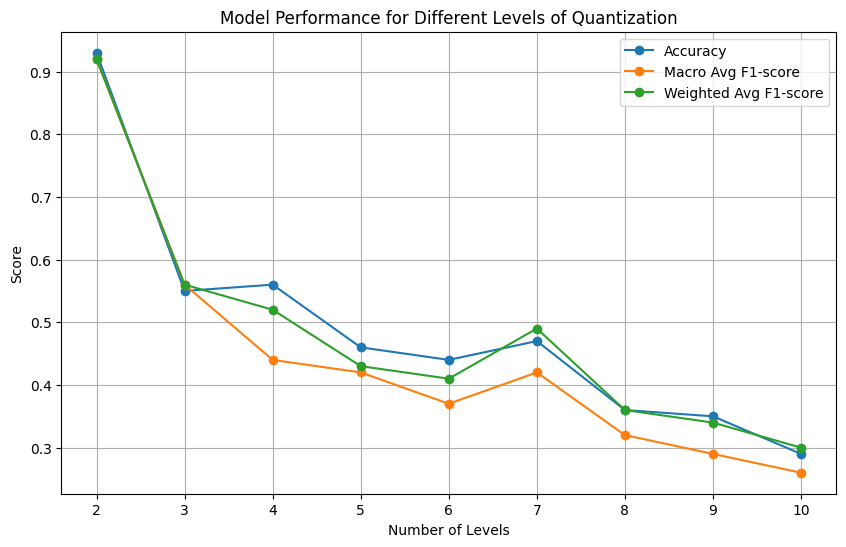

In [9]:
# Number of levels
levels = list(range(2, 11))

# Accuracy scores for each level
accuracy_scores = [0.93, 0.55, 0.56, 0.46, 0.44, 0.47, 0.36, 0.35, 0.29]

# Macro average f1-scores for each level
macro_avg_f1_scores = [0.92, 0.56, 0.44, 0.42, 0.37, 0.42, 0.32, 0.29, 0.26]

# Weighted average f1-scores for each level
weighted_avg_f1_scores = [0.92, 0.56, 0.52, 0.43, 0.41, 0.49, 0.36, 0.34, 0.30]

plt.figure(figsize=(10, 6))

plt.plot(levels, accuracy_scores, marker='o', label='Accuracy')
plt.plot(levels, macro_avg_f1_scores, marker='o', label='Macro Avg F1-score')
plt.plot(levels, weighted_avg_f1_scores, marker='o', label='Weighted Avg F1-score')

plt.title('Model Performance for Different Levels of Quantization')
plt.xlabel('Number of Levels')
plt.ylabel('Score')
plt.grid(True)
plt.legend()

plt.show()

# Going a little further!

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.base import clone
from scipy import stats
import numpy as np

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [11]:
"""
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

"""

'\nfrom google.colab import files\nfiles.upload()  # Use this to select the kaggle.json file from your computer\n!mkdir -p ~/.kaggle\n!cp kaggle.json ~/.kaggle/\n!chmod 600 ~/.kaggle/kaggle.json\n\n'

Then use this code to automatically download the dataset into Colab.

In [12]:
"""
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip
"""

'\n!kaggle datasets download -d wenruliu/adult-income-dataset\n!unzip /content/adult-income-dataset.zip\n'

**Task:** Determine the number of null entries!

In [29]:
# Your code goes here!
data = pd.read_csv('Q2/adult.csv' , na_values='?')
null_entries = data.isnull().sum().sum()
print(null_entries)
data

6465


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

<div style="color:pink;">

1. **Drop the rows with null values:** This is the simplest approach. If the dataset is large and the rows with null values are not significantly high, this method can be used. However, it is not advisable when the number of such rows is high, as it may result in loss of valuable information.

2. **Drop the columns with null values:** If a particular feature column has a high percentage of null values, it might be better to drop the entire column as it may not contribute much information for the model. However, this should be used cautiously as even a column with a lot of null values might contain valuable information in the non-null values.

3. **Imputation with mean, median, or mode:** This is a statistical approach where the null values are filled with the mean, median, or mode of the rest of the values in the column. This is a good approach when the data is numerical and not highly skewed.

4. **Imputation using predictive models:** Null values can be predicted using machine learning models. A model like linear regression, logistic regression, or a random forest can be used to predict the null values in a column based on the other columns. This can be a very effective approach but can also be computationally expensive.

5. **Imputation using data filling methods like 'bfill' or 'ffill':** 'bfill' (backward fill) or 'ffill' (forward fill) methods propagate next or previous values respectively to fill the null values. This method can be used when the data is ordered and the previous or next value is a good indicator of the missing value.

The decision on which method to use depends on the nature of the data and the specific column. If the column is numerical and not skewed, imputation with mean or median might be a good option. If the column is categorical, mode imputation or predictive modeling might be better. If the data is time-series, 'bfill' or 'ffill' could be used. If a column has too many null values, it might be better to drop it. It's also important to consider the computational cost, especially for large datasets.

</div>

**Task:** Handle null entries using your best method.

In [35]:
# Fill null entries in numeric columns with the mean of the column
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].apply(lambda x: x.fillna(x.mean()))

# Fill null entries in categorical columns with the most frequent value in the column
for feature in data.select_dtypes(include=['object']).columns:
    most_frequent = data[feature].mode()[0]
    data[feature].fillna(value=most_frequent, inplace=True)

remaining_na = data.isna().values.sum()

print("number of remaining null values: ", remaining_na)

number of remaining null values:  0


/var/folders/8l/5xcxk9c1563g0bc97fhqvgkr0000gp/T/ipykernel_4751/3960527822.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(value=most_frequent, inplace=True)


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [36]:
# Your code goes here!

data = pd.read_csv('Q2/adult.csv')

# Convert categorical features to numerical values
le = LabelEncoder()
for column in data.columns:
    if column != "income":
        if data[column].dtype == type(object):
            data[column] = le.fit_transform(data[column])

# Split the dataset into training and testing sets
X = data.drop('income', axis=1)  
y = data['income'].apply(lambda x: 0 if x == '<=50K' else 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Normalize the data using the training set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear' , 'saga']}

# Use the built-in Logistic Regression function and GridSearchCV to train the model
clf = GridSearchCV(LogisticRegression(), param_grid)
clf.fit(X_train, y_train)

# Report the parameters, train and test accuracy of the best model
print("Best parameters: ", clf.best_params_)
print("Training accuracy: ", clf.score(X_train, y_train))
print("Testing accuracy: ", clf.score(X_test, y_test))

Best parameters:  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Training accuracy:  0.8242776341719346
Testing accuracy:  0.8262872351315386


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [37]:
# Split X_train into 10 parts
X_train_parts = np.array_split(X_train, 10)
y_train_parts = np.array_split(y_train, 10)

# Train 10 separate Logistic Regression models
models = []
for i in range(10):
    model_clone = LogisticRegressionModel()
    model_clone.fit(X_train_parts[i], y_train_parts[i].to_numpy())  # convert Series to numpy array
    models.append(model_clone)


# Ensemble method 1: Majority voting
predictions_majority_voting = []
for model in models:
    predictions_majority_voting.append(model.predict(X_test))
predictions_majority_voting = stats.mode(np.array(predictions_majority_voting))[0][0]

# Ensemble method 2: Average probabilities
predictions_average_probabilities = sum(model.predict_proba(X_test) for model in models) / i
predictions_average_probabilities = (predictions_average_probabilities > 0.5).float().cpu().numpy()

# Ensemble method 3: Weighted probabilities
weights = [1 / (i + 1) for i in range(10)]
y_pred_proba_ensemble = np.average([model.predict_proba(X_test) for model in models], axis=0, weights=weights)
predictions_weighted_probabilities = [1 if prob > 0.5 else 0 for prob in (y_pred_proba_ensemble[:, 1] if y_pred_proba_ensemble.ndim > 1 else y_pred_proba_ensemble)]

# Print test accuracies
print("Test accuracy (majority voting): ", np.mean(predictions_majority_voting == y_test))
print("Test accuracy (average probabilities): ", np.mean(predictions_average_probabilities == y_test))
print("Test accuracy (weighted probabilities): ", np.mean(predictions_weighted_probabilities == y_test))

/opt/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Test accuracy (majority voting):  0.7614904289077695
Test accuracy (average probabilities):  0.8164602313440475
Test accuracy (weighted probabilities):  0.8174838775719111


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

<div style="color:pink;">

In this code we first split X_train and y_train into 10 equal part and after that train them with 10 different Logistic regression and after that we implement three different ensemble method which I will briefly describe them in below : 

1. **Majority Voting:** This method involves having each model in the ensemble vote for the class label, and then the class label that gets the majority of votes is chosen as the final prediction. This method is simple and often effective, as it can smooth out individual errors made by each model. However, it assumes that all models are equally good, which may not be the case.

2. **Average Probabilities:** This method involves averaging the predicted probabilities of each class for each model, and then choosing the class with the highest average probability as the final prediction. This method can be more effective than majority voting when the models' confidence in their predictions is informative. It also assumes that all models are equally good.

3. **Weighted Probabilities:** This method is similar to averaging probabilities, but it assigns more weight to the predictions of some models than others. In this case, the weights are inversely proportional to the model's index, so earlier models have more weight. This method can be more effective when some models are known or expected to be more accurate than others.

These methods were chosen because they are simple, intuitive, and often effective ways to combine the predictions of multiple models. They can help to improve prediction accuracy by leveraging the strengths of multiple models and mitigating their weaknesses.

</div>

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

Best i: 67
Train accuracy of the best model: 0.8172651191359762
Test accuracy of the best model: 0.8205548162555021


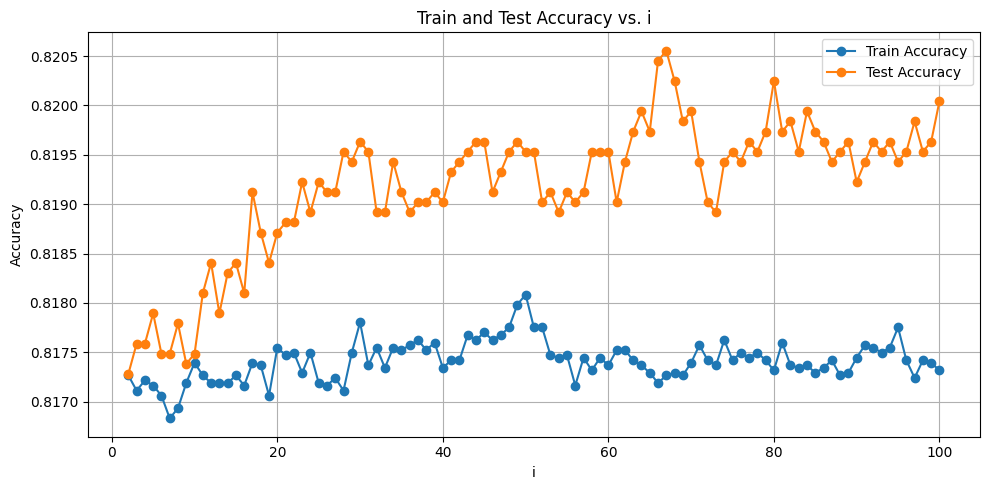

In [41]:
# Your code goes here!
def calculate_accuracy(X, y, models, weights):
    # Calculate weighted probabilities
    y_pred_proba_ensemble = np.average([model.predict_proba(X) for model in models], axis=0, weights=weights)
    
    # Determine class based on probability
    predictions = [1 if prob > 0.5 else 0 for prob in (y_pred_proba_ensemble[:, 1] if y_pred_proba_ensemble.ndim > 1 else y_pred_proba_ensemble)]
    
    # Calculate accuracy
    accuracy = np.mean(predictions == y)
    
    return accuracy


# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []

# Iterate over the range of 2 to 100
for i in range(2, 101):
    # Split X_train into i parts
    X_train_parts = np.array_split(X_train, i)
    y_train_parts = np.array_split(y_train, i)

    # Train i separate Logistic Regression models
    models = []
    for j in range(i):
        model_clone = LogisticRegressionModel()
        model_clone.fit(X_train_parts[j], y_train_parts[j].to_numpy())  # convert Series to numpy array
        models.append(model_clone)

    # Calculate weights
    weights = [1 / (j + 1) for j in range(i)]

    # Calculate train and test accuracy
    train_accuracy = calculate_accuracy(X_train, y_train, models, weights)
    test_accuracy = calculate_accuracy(X_test, y_test, models, weights)
    
    # Store accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Find the best model
best_i = np.argmax(test_accuracies) + 2
best_train_accuracy = train_accuracies[best_i - 2]
best_test_accuracy = test_accuracies[best_i - 2]

print(f"Best i: {best_i}")
print(f"Train accuracy of the best model: {best_train_accuracy}")
print(f"Test accuracy of the best model: {best_test_accuracy}")




# Plot train and test accuracy for each i
plt.figure(figsize=(10, 5))
plt.plot(range(2, 101), train_accuracies, label='Train Accuracy', marker='o')
plt.plot(range(2, 101), test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('i')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. i')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Question:** Analyze the results.

**Your Answer:** Altering the quantity of sections didn't significantly affect the models' performance.